In [37]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
with open('output.json') as file:
     measurements = json.load(file)['measurements']

In [39]:
groupedByImputer = {}
for entry in measurements:
    temp = groupedByImputer.get(entry['imputer'],[])
    if entry['scaler'] == 'RobustScaler':
        continue
    temp.append(entry)
    groupedByImputer[entry['imputer']] = temp

In [40]:
for entry in groupedByImputer['SimpleImputer']:
    if not 'Execution time in seconds' in entry.keys():
        print(entry)

In [41]:
for key, val in groupedByImputer.items():
    print(key)
    display(pd.Series([entry['Execution time in seconds'] for entry in val]).describe())

SimpleImputer


count     66.000000
mean     138.167768
std       85.463732
min       35.431654
25%       76.275342
50%       86.108824
75%      211.417563
max      321.767006
dtype: float64

KNNImputer


count      56.000000
mean     1902.684242
std      1218.919103
min       354.992807
25%      1097.666667
50%      1532.978972
75%      2154.263943
max      5565.215958
dtype: float64

In [42]:
display(pd.Series([entry['best_params']['impute__n_neighbors'] for entry in groupedByImputer['KNNImputer']]).describe())

count    56.000000
mean     17.428571
std      18.274530
min       2.000000
25%       2.000000
50%      11.000000
75%      32.000000
max      74.000000
dtype: float64

/home/finn/miniconda3/envs/dataMiningProject/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

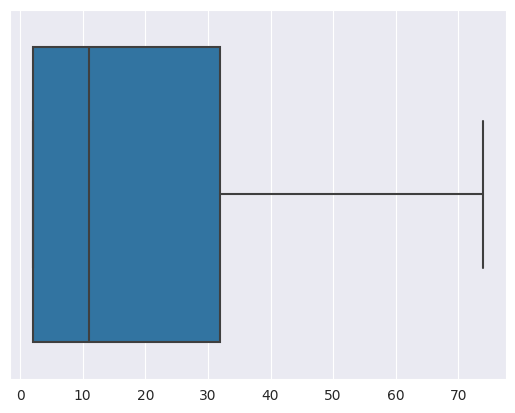

In [43]:
sns.boxplot(pd.Series([entry['best_params']['impute__n_neighbors'] for entry in groupedByImputer['KNNImputer']]))

In [45]:
temp = []
for entry in measurements:
    if entry['scaler'] == 'RobustScaler':
        continue
    temp.append([entry['imputer'], entry["scaler"], entry["estimator"], entry['AUC mean'], entry['minimumPercentageMissingToBeDropped']])
df = pd.DataFrame(temp, columns=['imputer', 'scaler', 'estimator', 'AUC mean', 'minimumPercentageMissingToBeDropped'])

MaxAbsScaler


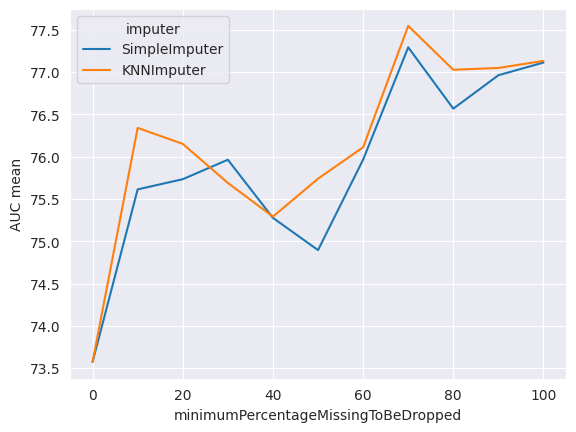

MinMaxScaler


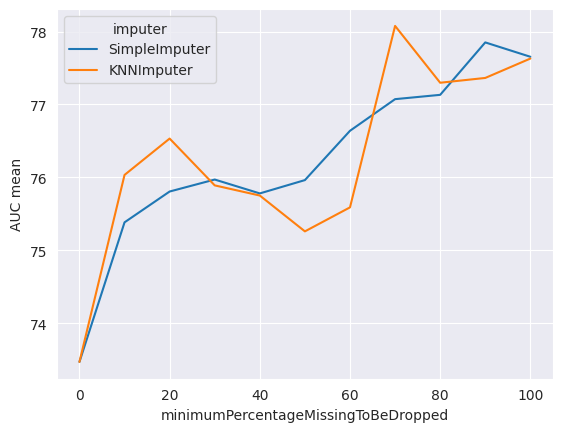

Normalizer


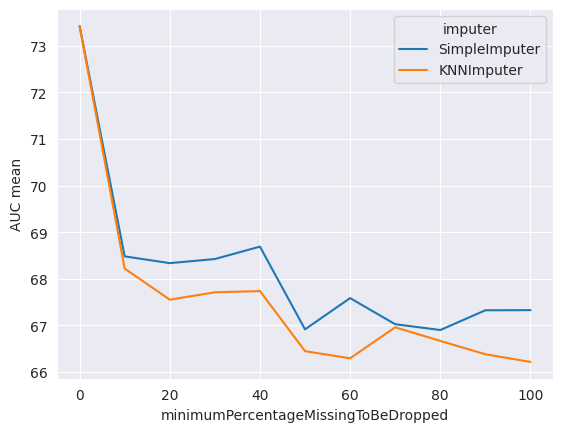

PowerTransformer


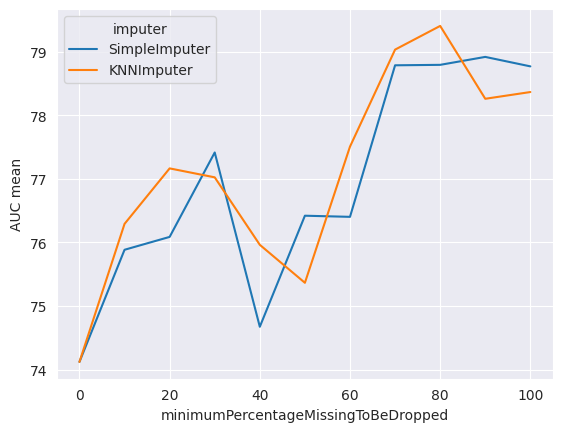

FunctionTransformer


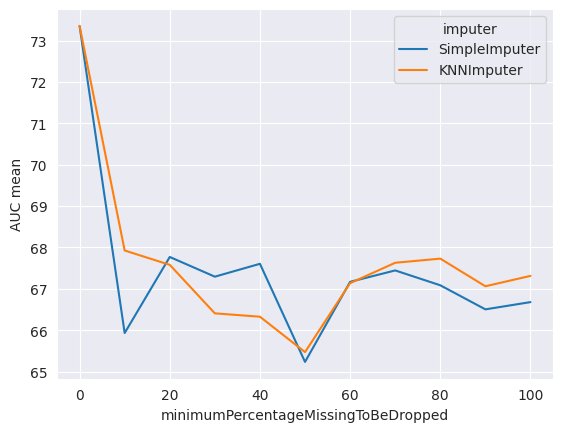

StandardScaler


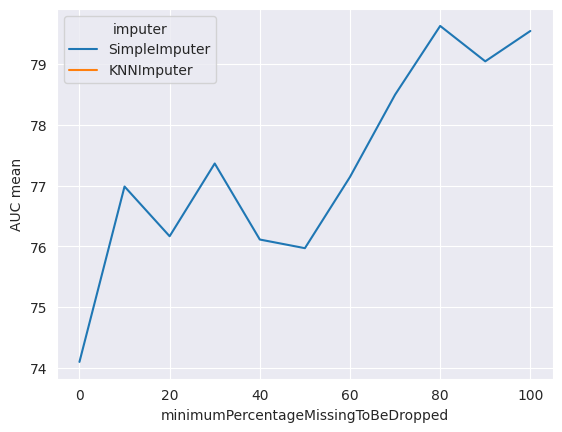

In [46]:
for scaler in df['scaler'].unique():
    print(scaler)
    sns.lineplot(data=df[df['scaler'] == scaler], x= 'minimumPercentageMissingToBeDropped', y='AUC mean', hue='imputer')
    plt.show()